# Ödev 1 
Aşağıda verilen soruları gerçekleştirin.
Veri seti : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

a) Yaşam alanı (sqft_living) ve arsa (sqft_lot) özniteliklerini (feature, attribute) kullanarak evin fiyatını tahmin edecek basit bir regresyon modeli geliştiriniz.

b) Veri setindeki bütün öznitelikleri kullanarak çok değişkenli bir regresyon modeli ile evin fiyatını tahmin ediniz.

Bu iki modeli karşılaştırarak sonuçlarını tartışınız. 

  **Not: Regresyon modeli için hazır kütüphane kullanmayınız. Algoritmayı 
kendiniz kodlayınız.**

## Soru 1 

---

Bu soru 3 aşamadan oluşmakta. 

1.   Verileri Hazırlama
2.   Gerekli Fonksiyonların Yazımı ve Eğitim
3.   Sonuçların değerlendirilmesi





İlk olarak gerekli kütüphaneleri import edelim

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Şimdi veri dosyamızı okuyalım ve sırasıyla verilerimizi inceleyelim. Bilgilerine bakalım

### 1.Veri Hazırlama

Bu bölümde veriler düzgün formatta hazırlanır ve görselleştirilir. 

In [58]:
data_frame = pd.read_csv("kc_house_data.csv")
print(data_frame.shape)
data_frame.head()


(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [41]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Null verimiz olmadığına göre artık verilerimiz üzerinde işlemler yapmaya başlayabiliriz. 

İlk olarak parametre ile sonuç arasındaki ilişkileri grafiğe dökelim.

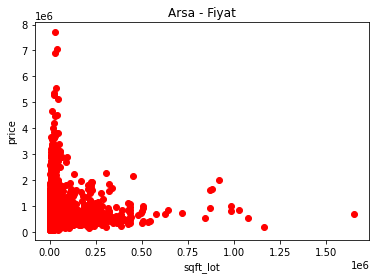

In [42]:
plt.scatter(x = data_frame[['sqft_lot']] , y=data_frame[["price"]] , color="red")  
 
# tanım
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.title("Arsa - Fiyat")
plt.show()


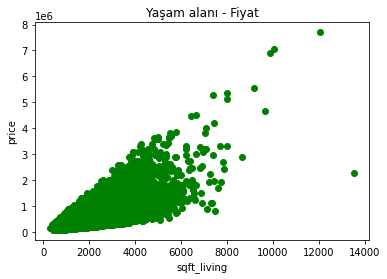

In [43]:
plt.scatter(x = data_frame['sqft_living'] , y=data_frame["price"] , color="green")       
# tanım
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("Yaşam alanı - Fiyat")
plt.show()

Şimdi verilerimizi train ve test olarak ayırıyoruz. Oran olarak %70 tercih edildi.

In [44]:
from sklearn.model_selection import train_test_split


X = data_frame[['sqft_living','sqft_lot']]
Y = data_frame[["price"]]
x_train, x_test, y_train, y_test =  train_test_split(X,Y,train_size=0.7) # %80 ini test için ayır.

print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


Verilerimizi sayı değerleri çok yüksek olduğu için bunların eğitilmesi çok uzun sürecektir. 

Bu yüzden her x değerlerinr MinMaxNormalizasyon uyguluyoruz. Bu şekilde verilerimiz 0 - 1 arasına indirgenmiş olacak ve daha hızlı eğitilecekler

In [59]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaler.fit(x_train) 
# x train scale edilecek. Bu yüzden uygun hale getirildi.

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test) 


print(type(y_train)) # pandas tipi
type(x_train)        # numpy tipi 


<class 'pandas.core.frame.DataFrame'>


numpy.ndarray

Artık verilerle işimiz tamamlandı. Verileri eğitmek için gerekli olan fonksiyonları yazma aşamasına geçebiliriz.

### 2. Gerekli Fonksiyonların Yazımı

Bu bölümde 
* J maliyet fonksiyonu , 
* Gradient Descent algoritmasını uygulayan fonksiyon ve 
* Gradient Descent içerisinde maliyetin türevinin alındığı J_derivate fonksiyonları 

bulunmaktadır.


In [60]:
def J(X, Y, Q0, Q1, Q2 ):
    """ VERİLEN Q DEĞERLERİ İÇİN TÜM TABLOYU DENER VE GERÇEK Y İLE FARKIN KARELERİNİ TOPLAR. BÖYLECE MALİYETİ ÖLÇER """
    # X : x_test.values
        # X[i][0] : sqft_living  
        # X[i][1] : sqft_lot 

    # Y : y_test.values
    # hx = Q0 + Q1*x1 + Q2x2   
    
    total = 0
    m = len(X)
    for i in range(m):
        total = total + ( Q0 + Q1*X[i][0] + Q2*X[i][1] - Y[i][0])**2
    return 1/(2*m) * total 

    
    
def J_derivate(X, Y, Q0, Q1, Q2, k ):
    """GRADİENT D. ALGORİTMASI İÇİN MALİYETİN, TÜREVİNİN ALINDIKTAN SONRA, HESAPLANDIĞI KISIM"""
    # X : x_test.values
        # X[i][0] : sqft_living  
        # X[i][1] : sqft_lot 

    # Y : y_test.values
    # hx = Q0 + Q1*x1 + Q2x2  
    total = 0
    result = 0
    m = len(X)
    if(k==0):
        for i in range(m):
            
            total = total + (  Q0 + Q1*X[i][0] + Q2*X[i][1] - Y[i][0] )
    else:
        for i in range(m):
            
            total = total + ( Q0 + Q1*X[i][0] + Q2*X[i][1] - Y[i][0] )*X[i][k-1]

    result = (1/m) * total 
    return result 

Başlangıç için Q değerlerini 1,1,1 seçebiliriz. Fakat bu sayılar optimum değerlere doğru değişeceği için doğru seçim yapmak önemlidir. 

In [61]:
Q    = [1,1,1]
# maliyetlerimizi bir listede tutalım
cost = []
Q

[1, 1, 1]

Maliyet[0] =  211994422122.83014
Q :  [189172.28108151417, 31909.64910854201, 1978.629808102495]


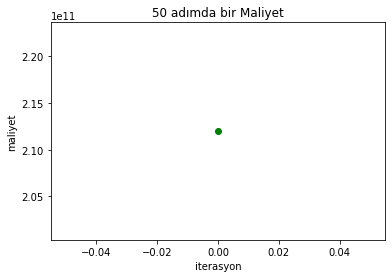

Maliyet[50] =  60646941936.34767
Q :  [492363.2603005014, 371020.50021135074, 18380.801953242764]


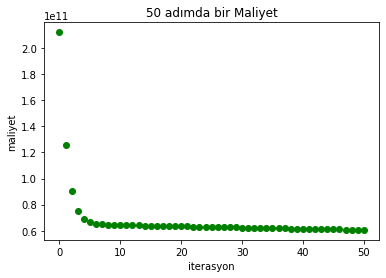

Maliyet[100] =  56613375844.456924
Q :  [455735.23891325726, 639955.9492936564, 30143.506433011924]


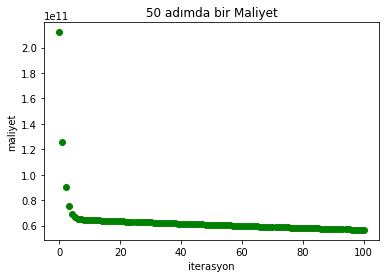

Maliyet[150] =  53204125367.76494
Q :  [422064.9790617451, 887207.2325195705, 40457.68329711528]


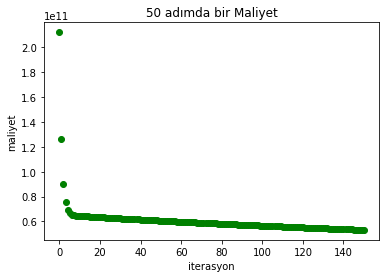

Maliyet[200] =  50322459675.002266
Q :  [391113.61556142056, 1114525.1820151892, 49445.723723374984]


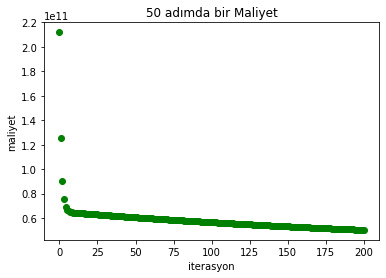

Maliyet[250] =  47886638823.119865
Q :  [362661.57384796906, 1323519.236891599, 57220.07591889811]


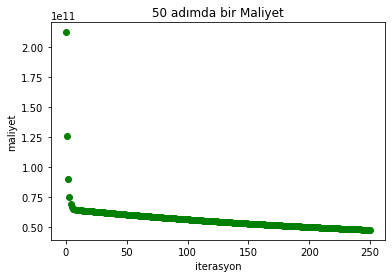

Maliyet[300] =  45827590348.19264
Q :  [336507.012152733, 1515668.8621054844, 63884.04875106168]


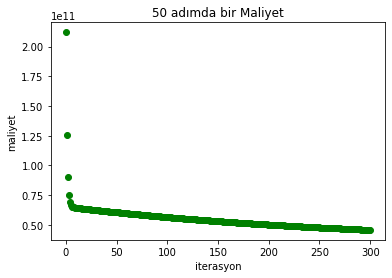

Maliyet[350] =  44086945969.66305
Q :  [312464.38940329227, 1692334.0451220216, 69532.55046963671]


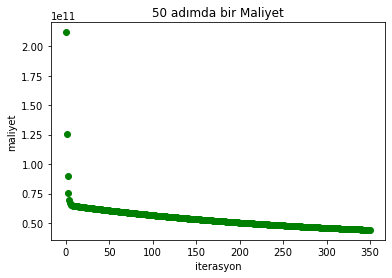

Maliyet[400] =  42615382591.9467
Q :  [290363.1487803287, 1854764.94486821, 74252.7677629171]


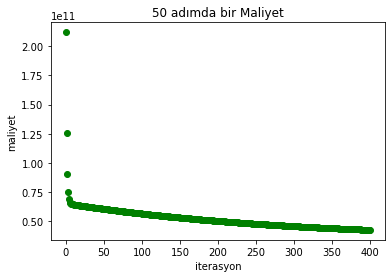

Maliyet[450] =  41371220438.5795
Q :  [270046.5075903764, 2004110.761437619, 78124.7899665514]


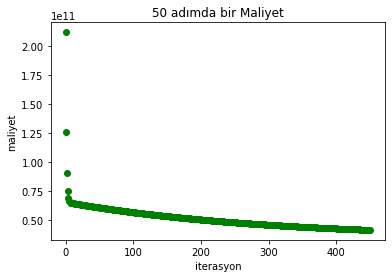

Maliyet[500] =  40319238464.482765
Q :  [251370.34486839405, 2141427.8894786304, 81222.18285461517]


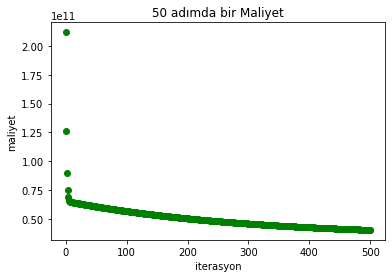

Maliyet[550] =  39429673369.24481
Q :  [234202.17881750097, 2267687.413115854, 83612.51608473338]


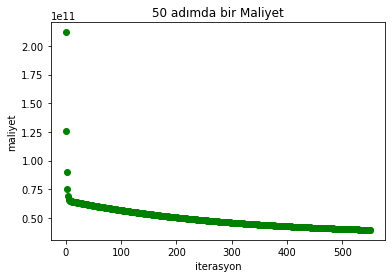

Maliyet[600] =  38677373754.15766
Q :  [218420.22683063254, 2383781.9955824753, 85357.84804022084]


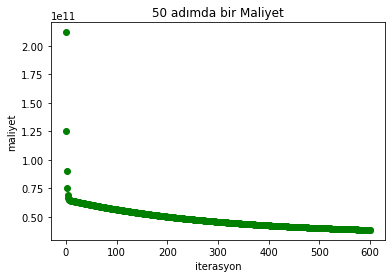

Maliyet[650] =  38041085376.53048
Q :  [203912.541424801, 2490532.2124466524, 86515.17150992708]


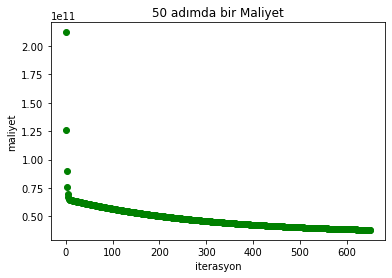

Maliyet[700] =  37502847181.92736
Q :  [190576.21595726704, 2588692.373367245, 87136.82336860037]


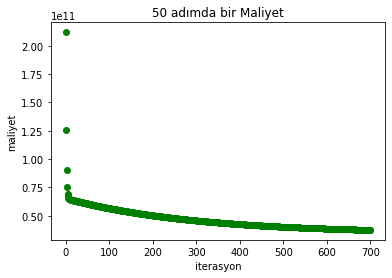

Maliyet[750] =  37047480944.398056
Q :  [178316.65448803254, 2678955.873685275, 87270.86116515765]


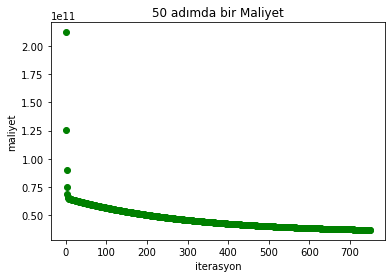

Maliyet[800] =  36662160006.051834
Q :  [167046.90060820535, 2761960.1138215032, 86961.4092914447]


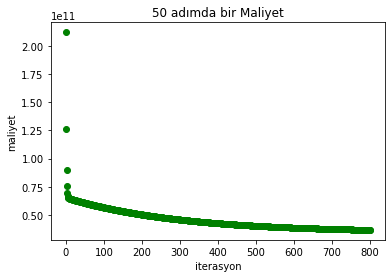

Maliyet[850] =  36336044856.11059
Q :  [156687.0204721504, 2838291.021384128, 86248.97718823257]


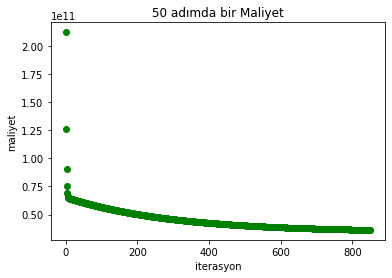

Maliyet[900] =  36059975189.79558
Q :  [147163.53565593745, 2908487.2080716607, 85170.75184678889]


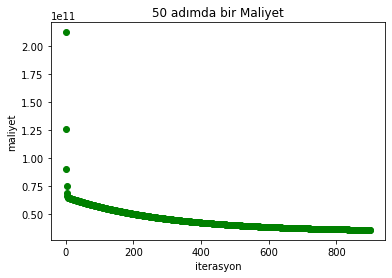

Maliyet[950] =  35826209693.11878
Q :  [138408.90181810805, 2973043.790864963, 83760.86668197987]


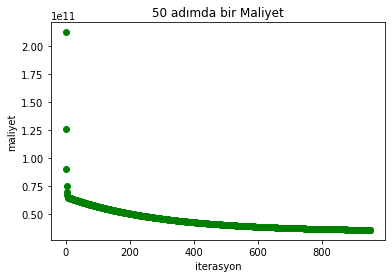

Maliyet[1000] =  35628206156.45712
Q :  [130361.02946377685, 3032415.9046203694, 82050.64868520075]


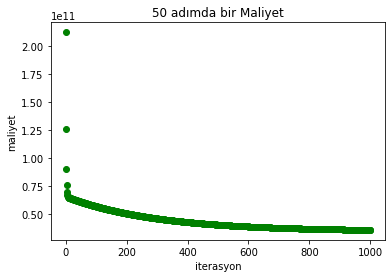

Maliyet[1050] =  35460435666.309616
Q :  [122962.84341179712, 3087021.9309863783, 80068.8456113222]


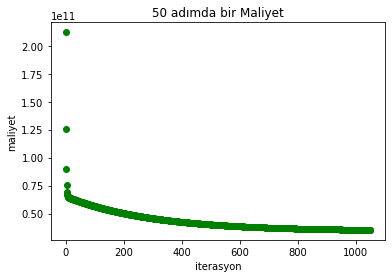

Maliyet[1100] =  35318225593.45218
Q :  [116161.87783933642, 3137246.4665535674, 77841.8348121671]


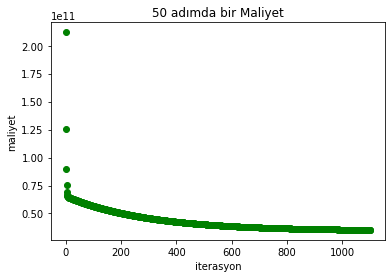

Maliyet[1150] =  35197626914.34888
Q :  [109909.90403063266, 3183443.0512972563, 75393.8151988078]


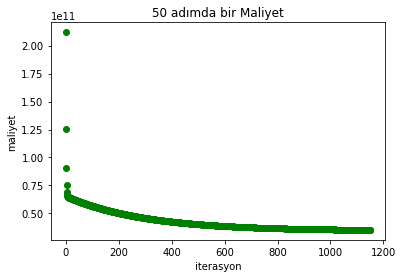

Maliyet[1200] =  35095302094.44369
Q :  [104162.58818873805, 3225936.6766716754, 72746.98369526168]


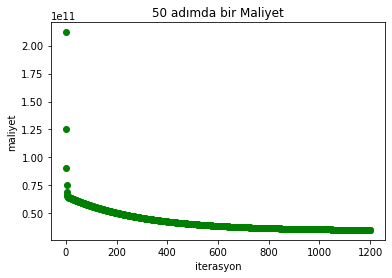

Maliyet[1250] =  35008430346.49043
Q :  [98879.17688237086, 3265026.0911509376, 69921.69743612203]


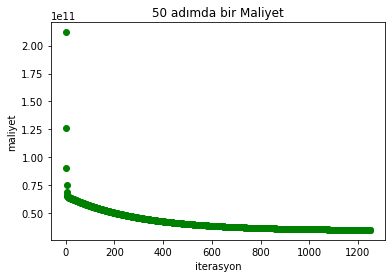

Maliyet[1300] =  34934627571.02682
Q :  [94022.20789606174, 3300985.9195750216, 66936.62285950423]


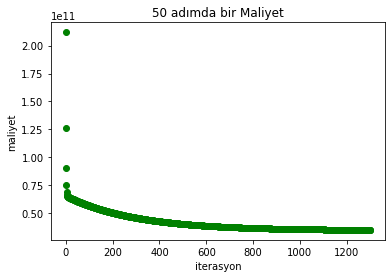

Maliyet[1350] =  34871878703.470894
Q :  [89557.24443202627, 3334068.6113378536, 63808.87275370221]


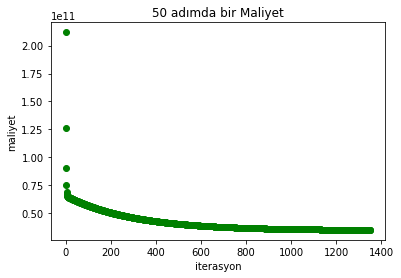

Maliyet[1400] =  34818480545.01241
Q :  [85452.63077787774, 3364506.2312402013, 60554.132230473486]


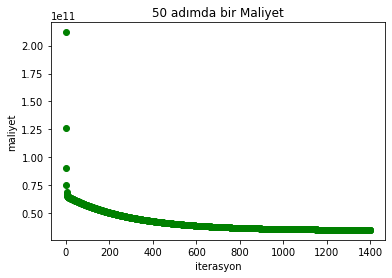

Maliyet[1450] =  34772993452.48842
Q :  [81679.2677066055, 3392512.105713718, 57186.77451929655]


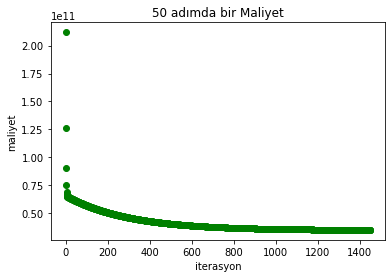

Maliyet[1500] =  34734200514.26861
Q :  [78210.40601523446, 3418282.3360964074, 53719.967404718394]


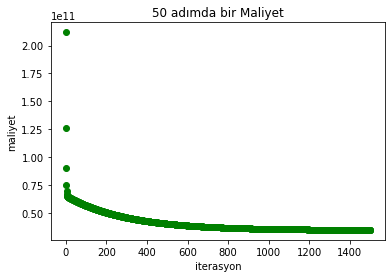

Maliyet[1550] =  34701073051.973274
Q :  [75021.45673729121, 3441997.1896963906, 50165.771062513006]


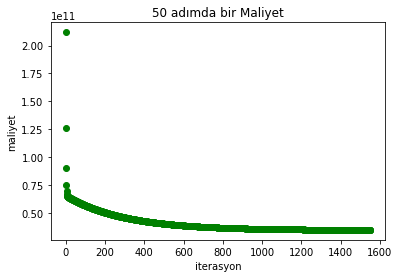

Maliyet[1600] =  34672741467.65798
Q :  [72089.81668250116, 3463822.378513788, 46535.22798934094]


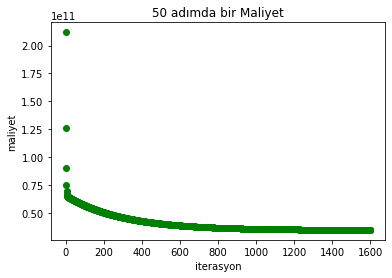

Maliyet[1650] =  34648470608.0529
Q :  [69394.70806588665, 3483910.234693453, 42838.44566449502]


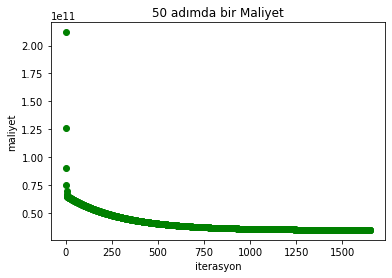

Maliyet[1700] =  34627638945.82773
Q :  [66917.03108841174, 3502400.7910485426, 39084.67253074528]


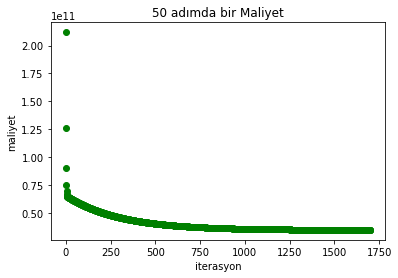

Maliyet[1750] =  34609720986.360756
Q :  [64639.228423202396, 3519422.7743214145, 35282.36783388788]


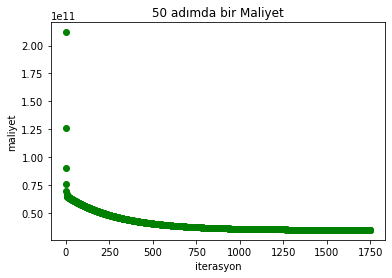

Maliyet[1800] =  34594272400.15609
Q :  [62545.16064585155, 3535094.518229172, 31439.26581702415]


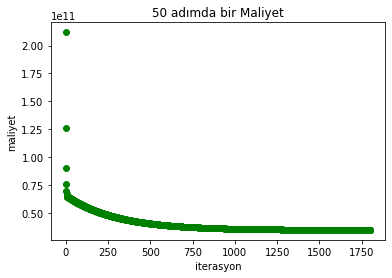

Maliyet[1850] =  34580917458.53477
Q :  [60619.99172496337, 3549524.8027720405, 27562.43472553609]


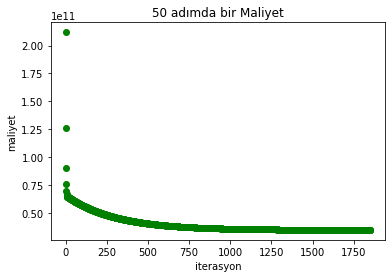

Maliyet[1900] =  34569338415.673065
Q :  [58850.08376047533, 3562813.625759566, 23658.331041900234]


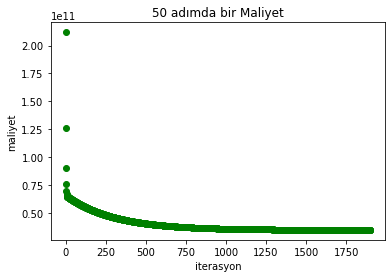

Maliyet[1950] =  34559266535.39268
Q :  [57222.90022290269, 3575052.912028762, 19732.849335631163]


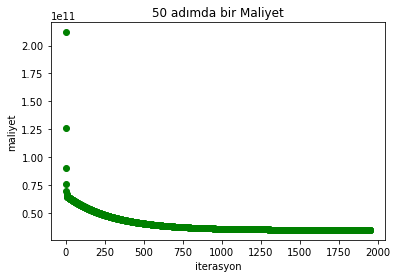

Maliyet[2000] =  34550474507.83585
Q :  [55726.91700697665, 3586327.165386138, 15791.368082529696]


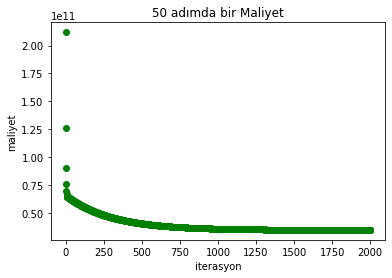

Maliyet[2050] =  34542770040.66608
Q :  [54351.54066858329, 3596714.0678992732, 11838.791778806519]


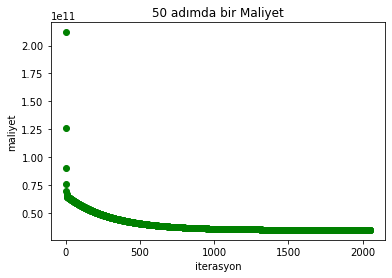

Maliyet[2100] =  34535990442.80739
Q :  [53087.03326488049, 3606285.030789951, 7879.589649358821]


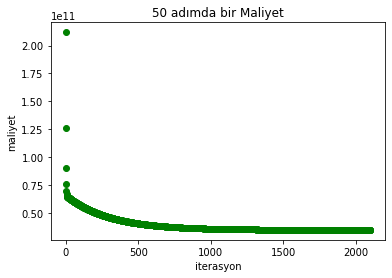

Maliyet[2150] =  34529998046.93654
Q :  [51924.443264321155, 3615105.7008375134, 3917.831225307003]


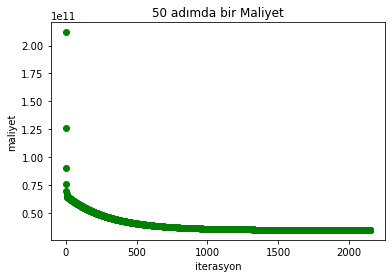

Maliyet[2200] =  34524676340.77857
Q :  [50855.54203637743, 3623236.425885431, -42.78095631948497]


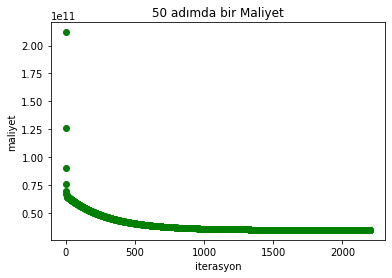

Maliyet[2250] =  34519926697.39104
Q :  [49872.76547034812, 3630732.682753904, -3998.8812982821564]


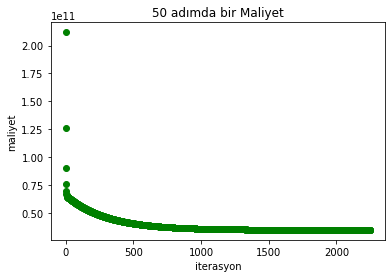

Maliyet[2300] =  34515665611.64334
Q :  [48969.160309026745, 3637645.470594571, -7947.413520528534]


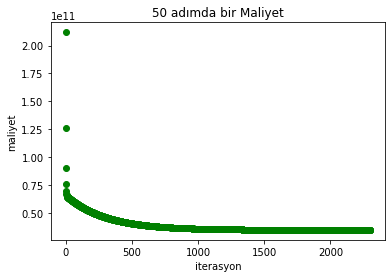

Maliyet[2350] =  34511822364.47097
Q :  [48138.33481645704, 3644021.6724782297, -11885.60527284973]


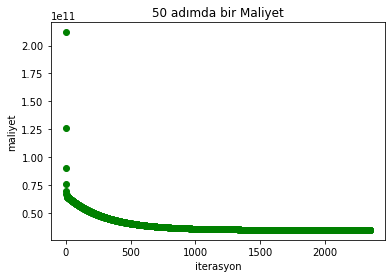

Maliyet[2400] =  34508337048.64577
Q :  [47374.41342975664, 3649904.3877810454, -15810.944802232505]


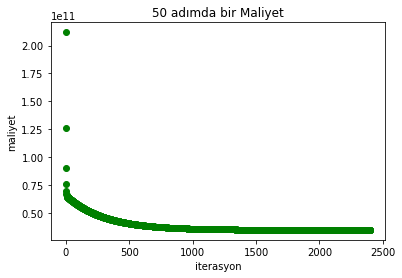

Maliyet[2450] =  34505158900.059006
Q :  [46671.99507325268, 3655333.2377275922, -19721.1595089208]


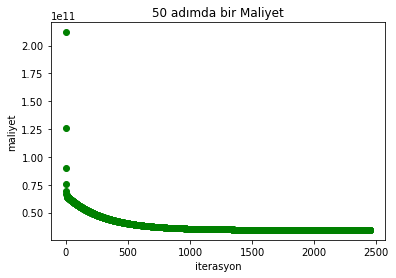

Maliyet[2500] =  34502244887.20182
Q :  [46026.11483916536, 3660344.646258533, -23614.196238607394]


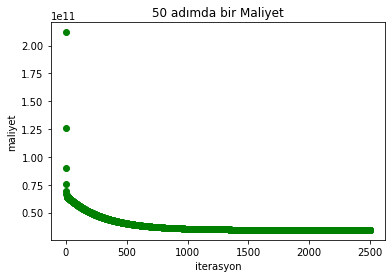

Maliyet[2550] =  34499558518.85483
Q :  [45432.20876295375, 3664972.098215754, -27488.20317049898]


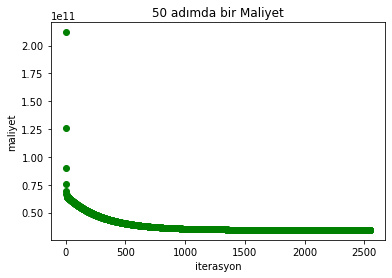

Maliyet[2600] =  34497068836.191696
Q :  [44886.08144340193, 3669246.3766767615, -31341.513172325584]


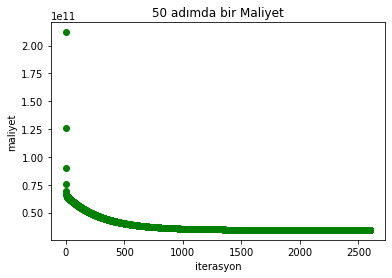

Maliyet[2650] =  34494749560.74188
Q :  [44383.876277701, 3673195.7811222724, -35172.62850377841]


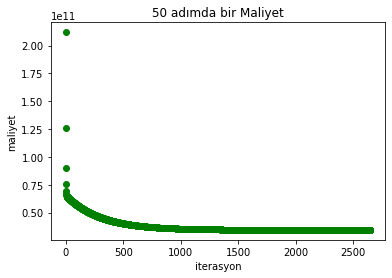

Maliyet[2700] =  34492578374.08175
Q :  [43922.04810034369, 3676846.3279848774, -38980.20675943134]


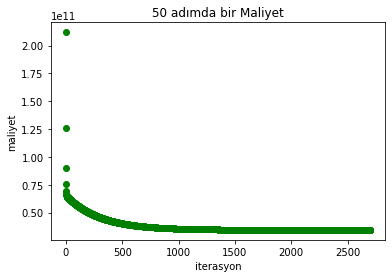

Maliyet[2750] =  34490536308.85864
Q :  [43497.338031697625, 3680221.9350016955, -42763.047951000946]


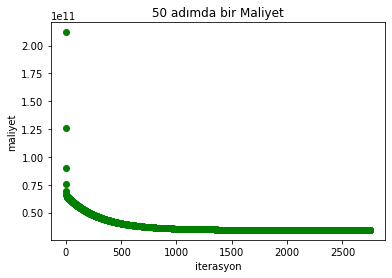

Maliyet[2800] =  34488607233.91082
Q :  [43106.750357802914, 3683344.590679005, -46520.082636887506]


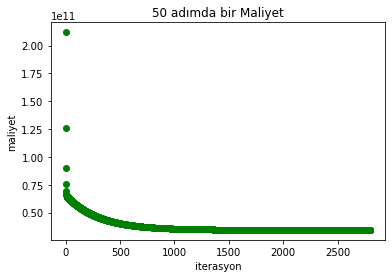

Maliyet[2850] =  34486777418.92463
Q :  [42747.531277356495, 3686234.510071183, -50250.36101437503]


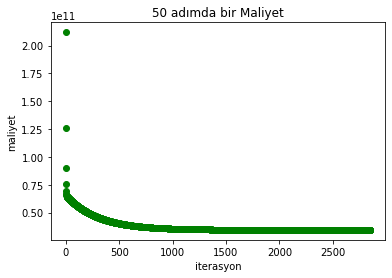

Maliyet[2900] =  34485035166.315895
Q :  [42417.14936508286, 3688910.27797925, -53953.04289670223]


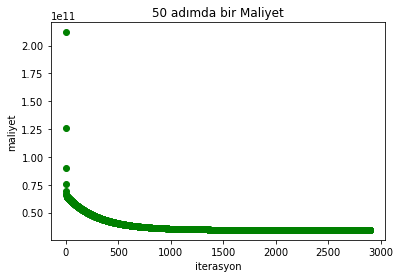

Maliyet[2950] =  34483370499.93277
Q :  [42113.277612883496, 3691388.980584952, -57627.388503499715]


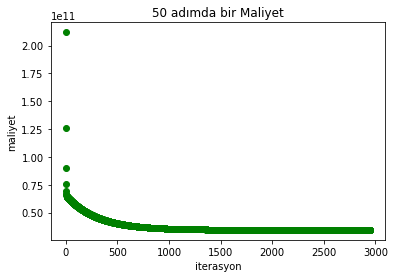

Maliyet[3000] =  34481774901.79193
Q :  [41833.77692133732, 3693686.3264543694, -61272.749998863284]


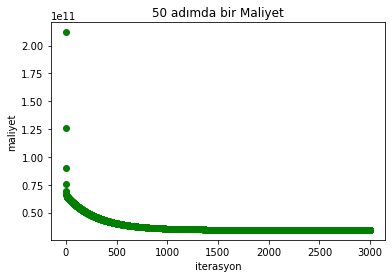

Maliyet[3050] =  34480241089.416664
Q :  [41576.68092442549, 3695816.757769545, -64888.56371664247]


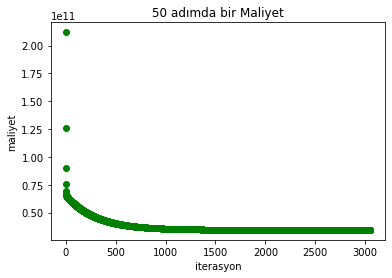

Maliyet[3100] =  34478762827.49557
Q :  [41340.18203980749, 3697793.552577321, -68474.34301740312]


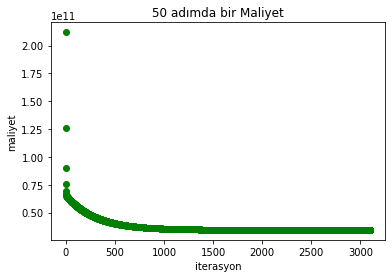

Maliyet[3150] =  34477334768.56111
Q :  [41122.618645675204, 3699628.9187808153, -72029.67172600869]


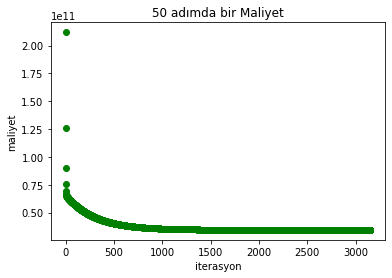

Maliyet[3200] =  34475952318.19453
Q :  [40922.46329320034, 3701334.080540426, -75554.19810289002]


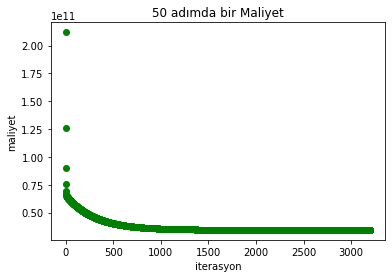

Maliyet[3250] =  34474611520.97223
Q :  [40738.31187094216, 3702919.357697341, -79047.62930586094]


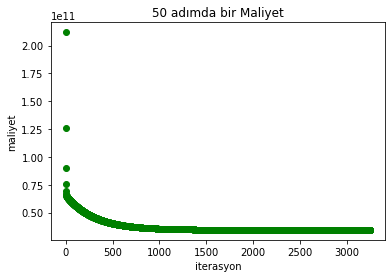

Maliyet[3300] =  34473308963.946915
Q :  [40568.873644335144, 3704394.238783068, -82509.72630282513]


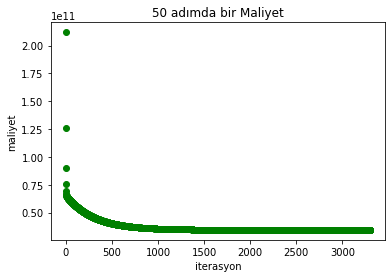

Maliyet[3350] =  34472041694.956276
Q :  [40412.962099584525, 3705767.4481329704, -85940.29919891954]


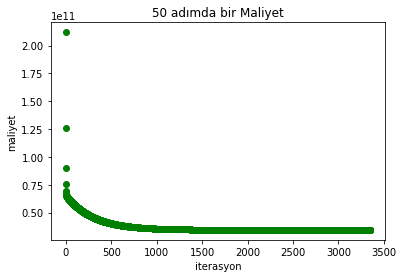

Maliyet[3400] =  34470807153.46734
Q :  [40269.4865270059, 3707047.007579967, -89339.2029445872]


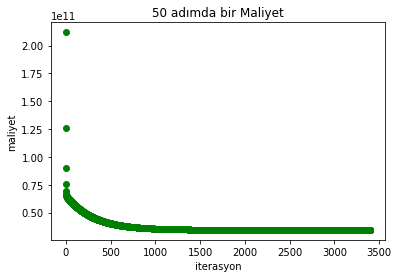

Maliyet[3450] =  34469603112.02641
Q :  [40137.444284092315, 3708240.293166096, -92706.33339377516]


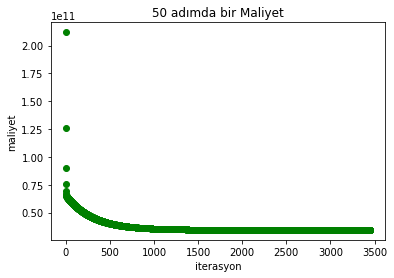

Maliyet[3500] =  34468427626.67301
Q :  [40015.913683413426, 3709354.0872743004, -96041.62368394491]


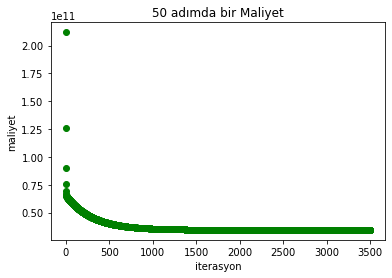

Maliyet[3550] =  34467278994.94019
Q :  [39904.047454885615, 3710394.626550292, -99345.04091186755]


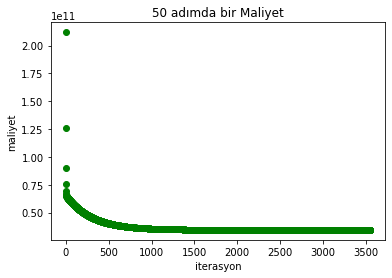

Maliyet[3600] =  34466155720.2688
Q :  [39801.06673602636, 3711367.645954488, -102616.58308127838]


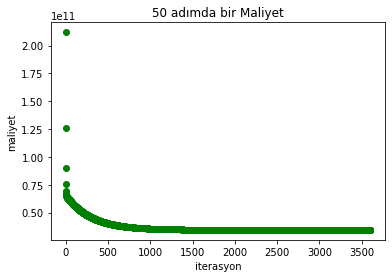

Maliyet[3650] =  34465056481.84901
Q :  [39706.25554755335, 3712278.4192565535, -105856.27630039986]


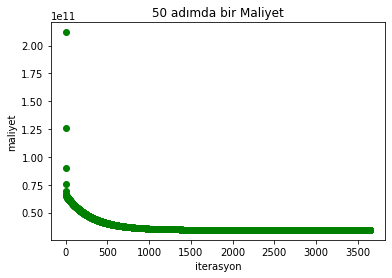

Maliyet[3700] =  34463980109.0541
Q :  [39618.9557151316, 3713131.7962598423, -109064.17220911587]


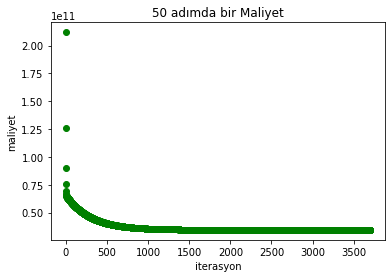

Maliyet[3750] =  34462925559.75869
Q :  [39538.562201238536, 3713932.2370198146, -112240.34561721557]


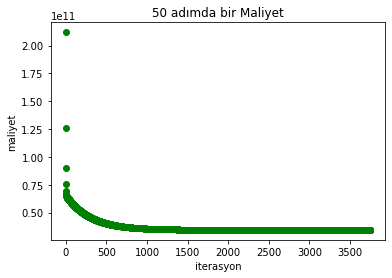

Maliyet[3800] =  34461891901.94425
Q :  [39464.5188140255, 3714683.8432992143, -115384.89233662451]


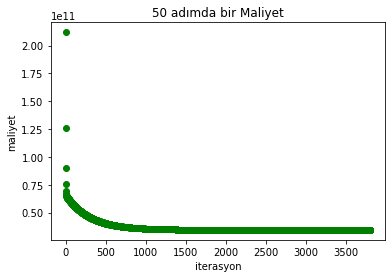

Maliyet[3850] =  34460878298.08928
Q :  [39396.31426272859, 3715390.3874831493, -118497.92719192182]


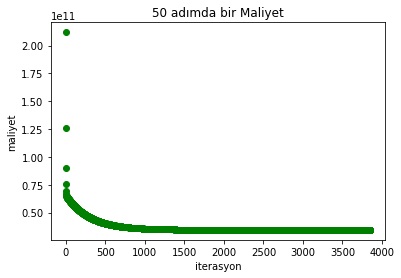

Maliyet[3900] =  34459883991.91333
Q :  [39333.4785316433, 3716055.339159217, -121579.58219470993]


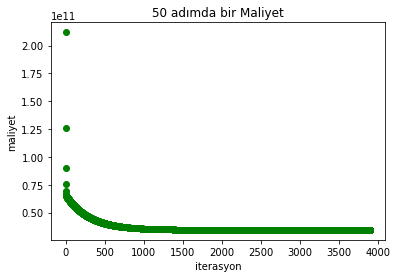

Maliyet[3950] =  34458908297.117195
Q :  [39275.57954693338, 3716681.8895512456, -124630.00486856981]


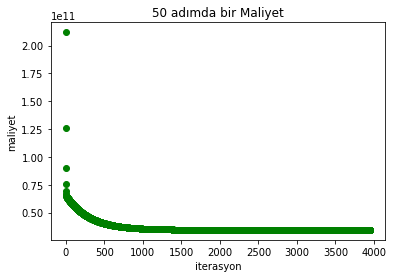

Maliyet[4000] =  34457950587.809746
Q :  [39222.220112628085, 3717272.9739799714, -127649.35671240574]


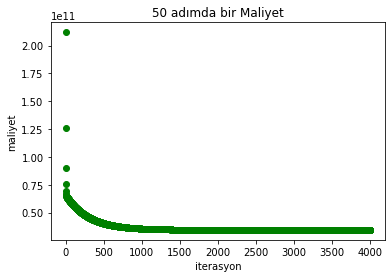

Maliyet[4050] =  34457010290.36827
Q :  [39173.03509406436, 3717831.29251003, -130637.81179097046]


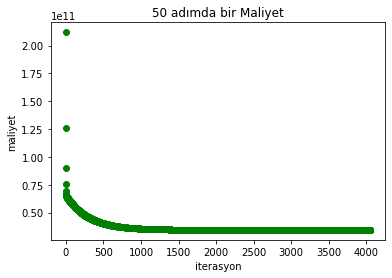

Maliyet[4100] =  34456086876.50883
Q :  [39127.68882879353, 3718359.3289296916, -133595.5554422652]


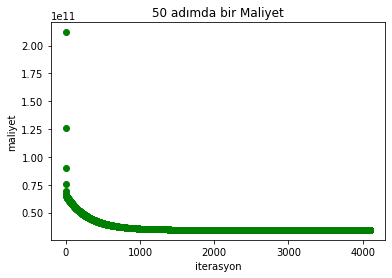

Maliyet[4150] =  34455179857.384186
Q :  [39085.872746580055, 3718859.3681980227, -136522.78309234363]


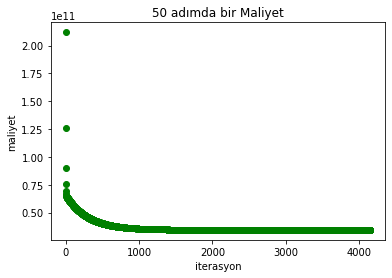

Maliyet[4200] =  34454288778.552826
Q :  [39047.30318160803, 3719333.5124832126, -139419.69916881243]


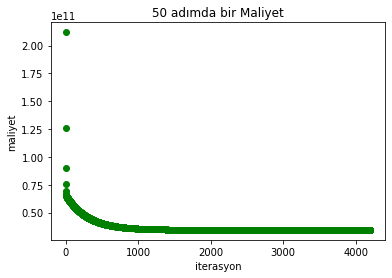

Maliyet[4250] =  34453413215.68568
Q :  [39011.71936137171, 3719783.695905859, -142286.5161050256]


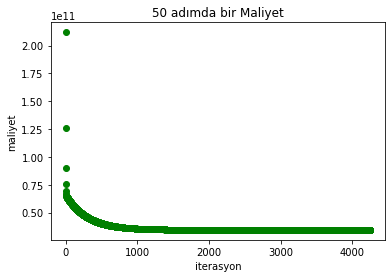

Maliyet[4300] =  34452552770.89976
Q :  [38978.881557980785, 3720211.6980917896, -145123.45342761645]


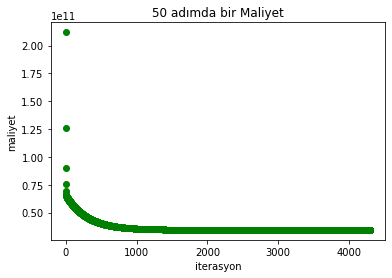

Maliyet[4350] =  34451707069.62173
Q :  [38948.56938876496, 3720619.1566305635, -147930.73692060463]


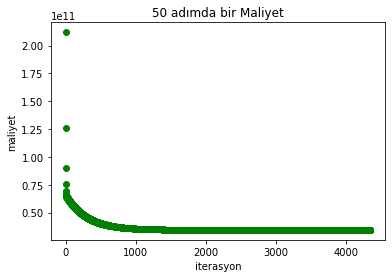

Maliyet[4400] =  34450875757.903435
Q :  [38920.58025412074, 3721007.5785280126, -150708.59785986392]


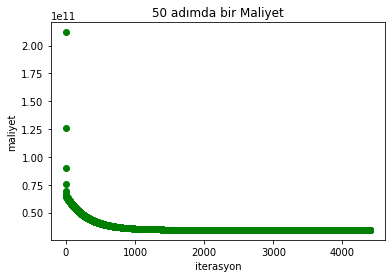

Maliyet[4450] =  34450058500.12082
Q :  [38894.7279015122, 3721378.350734106, -153457.27231223552]


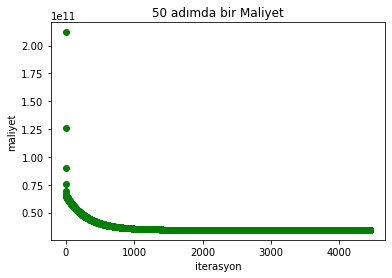

Maliyet[4500] =  34449254976.99783
Q :  [38870.84110544608, 3721732.74982074, -156177.00049403758]


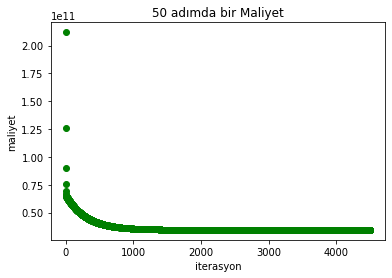

Maliyet[4550] =  34448464883.906235
Q :  [38848.762454046955, 3722071.950878174, -158868.02618414257]


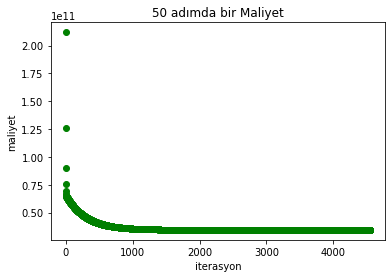

Maliyet[4600] =  34447687929.401955
Q :  [38828.347233628396, 3722397.0356931686, -161530.59618718532]


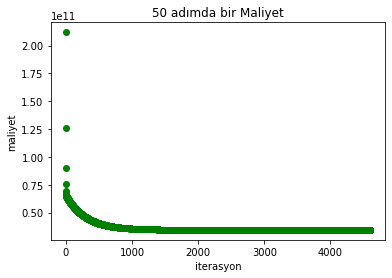

Maliyet[4650] =  34446923833.96074
Q :  [38809.46240334297, 3722709.0002668584, -164164.95984282554]


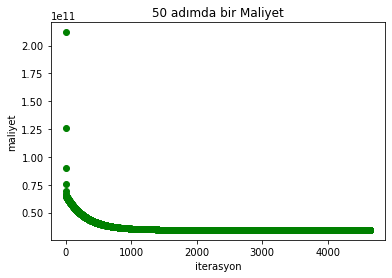

Maliyet[4700] =  34446172328.88485
Q :  [38791.98565263956, 3723008.761725653, -166771.36857731402]


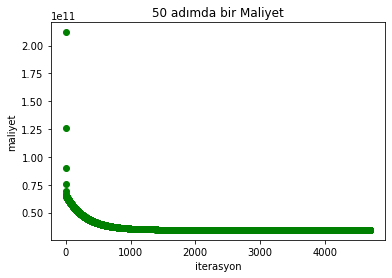

Maliyet[4750] =  34445433155.35594
Q :  [38775.80453483697, 3723297.1646742215, -169350.07549391722]


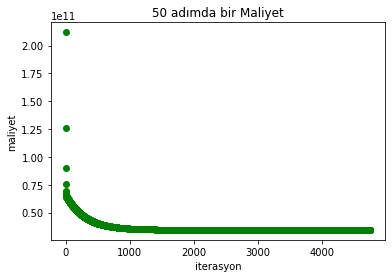

Maliyet[4800] =  34444706063.60971
Q :  [38760.815670670236, 3723574.98703557, -171901.3349990353]


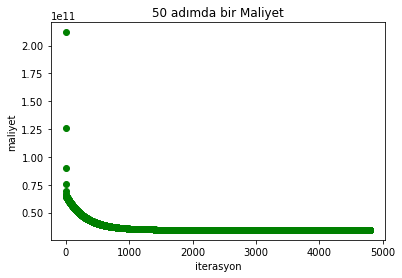

Maliyet[4850] =  34443990812.21927
Q :  [38746.92401615472, 3723842.9454196827, -174425.4024611006]


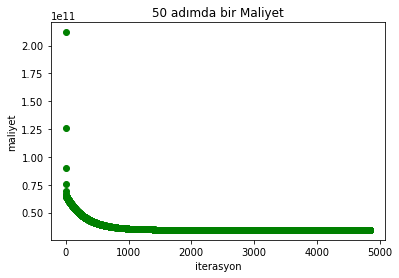

Maliyet[4900] =  34443287167.46634
Q :  [38734.042189577995, 3724101.7000587434, -176922.53389958185]


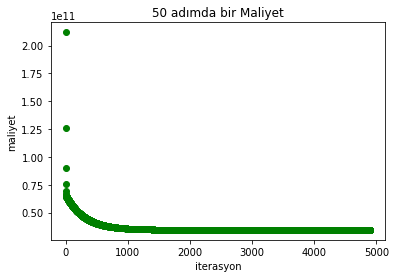

Maliyet[4950] =  34442594902.79293
Q :  [38722.08985284055, 3724351.859343994, -179392.9857016359]


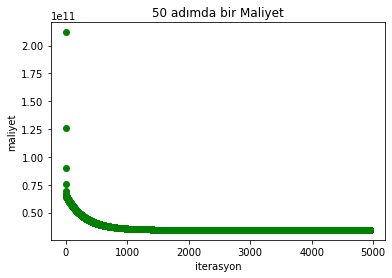

Maliyet[5000] =  34441913798.31576
Q :  [38710.993142759304, 3724593.983996348, -181837.01436414404]


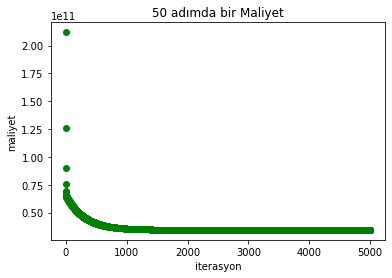

Maliyet[5050] =  34441243640.400894
Q :  [38700.68414829571, 3724828.5909003825, -184254.87625906023]


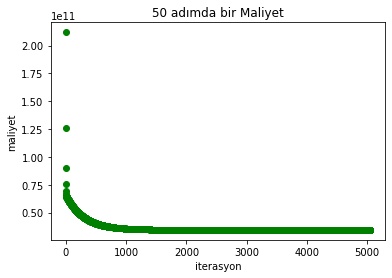

Maliyet[5100] =  34440584221.285484
Q :  [38691.10043000262, 3725056.1566288504, -186646.82742015648]


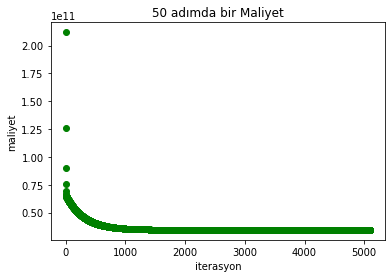

Maliyet[5150] =  34439935338.74162
Q :  [38682.18457827946, 3725277.12068273, -189013.1233494149]


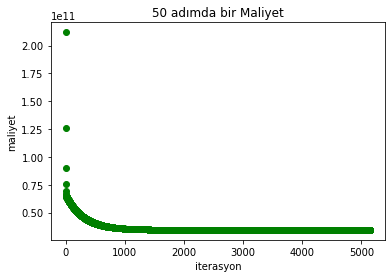

Maliyet[5200] =  34439296795.77721
Q :  [38673.88380729948, 3725491.888469784, -191354.01884145092]


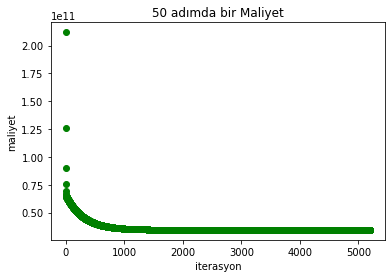

Maliyet[5250] =  34438668400.367096
Q :  [38666.14958173156, 3725700.8340427238, -193669.76782448764]


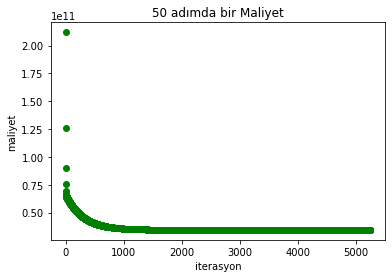

Maliyet[5300] =  34438049965.2131
Q :  [38658.937273605, 3725904.3026164193, -195960.62321651654]


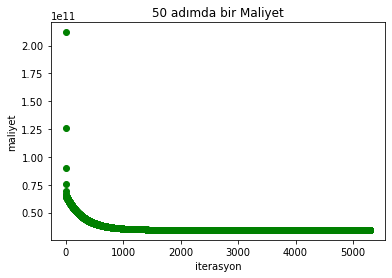

Maliyet[5350] =  34437441307.523994
Q :  [38652.20584688678, 3726102.6128819627, -198226.83679539454]


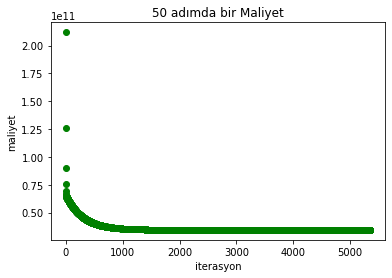

Maliyet[5400] =  34436842248.82043
Q :  [38645.91756752715, 3726296.059134036, -200468.65908172596]


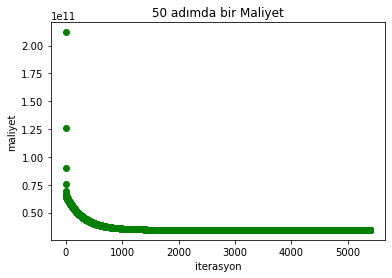

Maliyet[5450] =  34436252614.75359
Q :  [38640.03773692458, 3726484.913226603, -202686.33923347204]


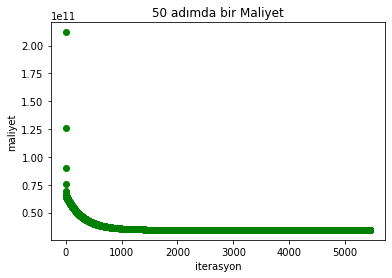

Maliyet[5500] =  34435672234.94103
Q :  [38634.53444691183, 3726669.426370842, -204880.124951317]


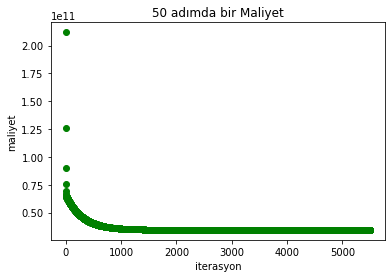

Maliyet[5550] =  34435100942.816246
Q :  [38629.37835452888, 3726849.830788018, -207050.26239389548]


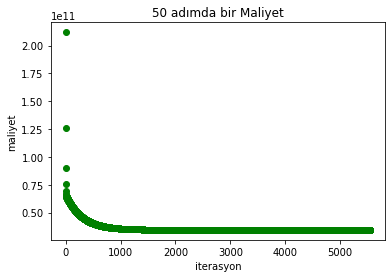

Maliyet[5600] =  34434538575.49002
Q :  [38624.54247498396, 3727026.341229031, -209196.99610206412]


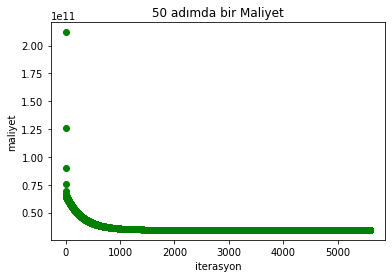

Maliyet[5650] =  34433984973.62102
Q :  [38620.00199133381, 3727199.1563713904, -211320.56893146044]


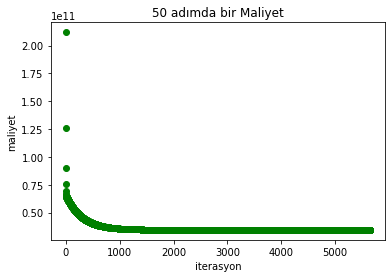

Maliyet[5700] =  34433439981.297035
Q :  [38615.73407953163, 3727368.4601035365, -213421.22199265638]


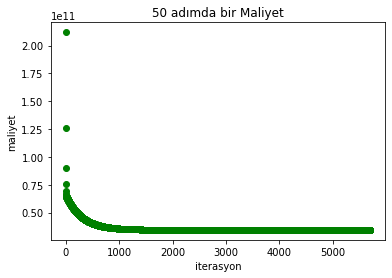

Maliyet[5750] =  34432903445.924515
Q :  [38611.7177476042, 3727534.422705572, -215499.19459827186]


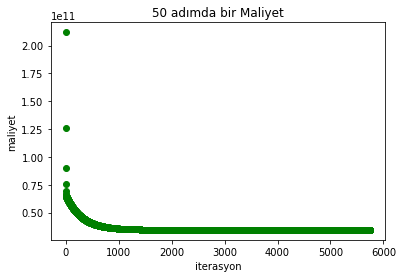

Maliyet[5800] =  34432375218.12249
Q :  [38607.9336878151, 3727697.201934795, -217554.72421646133]


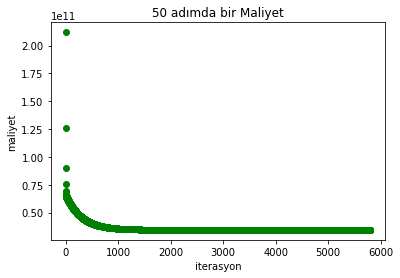

Maliyet[5850] =  34431855151.62745
Q :  [38604.3641407655, 3727856.9440237107, -219588.04643023532]


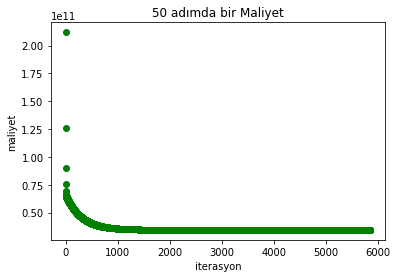

Maliyet[5900] =  34431343103.20022
Q :  [38600.992770469566, 3728013.784597587, -221599.39490212596]


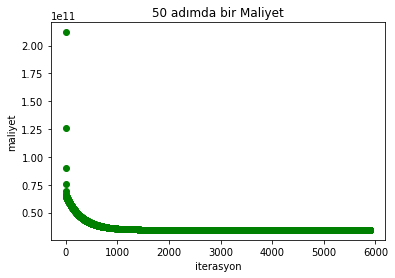

Maliyet[5950] =  34430838932.54001
Q :  [38597.80454951787, 3728167.849518043, -223589.00134373963]


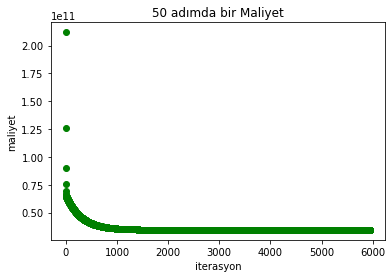

Maliyet[6000] =  34430342502.20184
Q :  [38594.78565351199, 3728319.2556586685, -225557.09548978164]


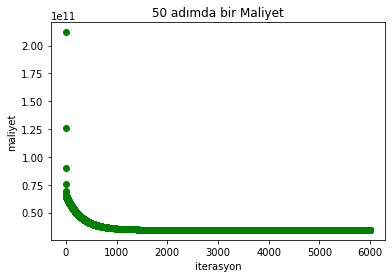

Maliyet[6050] =  34429853677.51911
Q :  [38591.92336402514, 3728468.1116181286, -227503.9050761693]


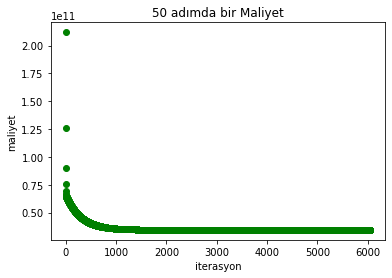

Maliyet[6100] =  34429372326.53015
Q :  [38589.20597939728, 3728614.518375825, -229429.65582188166]


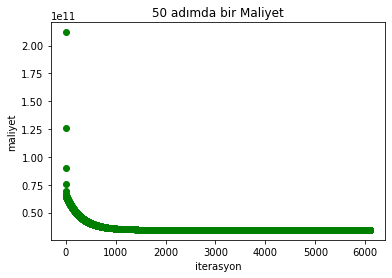

Maliyet[6150] =  34428898319.90762
Q :  [38586.62273273404, 3728758.5698947385, -231334.57141422384]


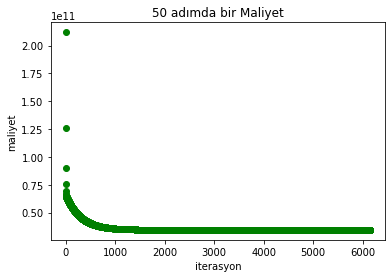

Maliyet[6200] =  34428431530.89009
Q :  [38584.16371652594, 3728900.353675724, -233218.8734972067]


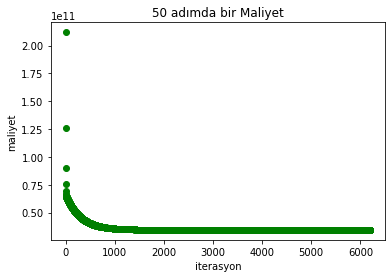

Maliyet[6250] =  34427971835.21901
Q :  [38581.819813354545, 3729039.9512671772, -235082.78166277215]


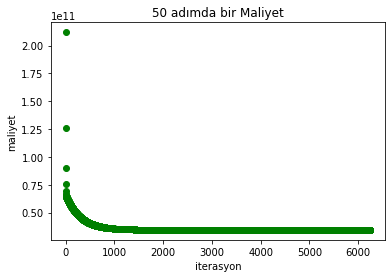

Maliyet[6300] =  34427519111.07678
Q :  [38579.58263219408, 3729177.4387336653, -236926.5134446117]


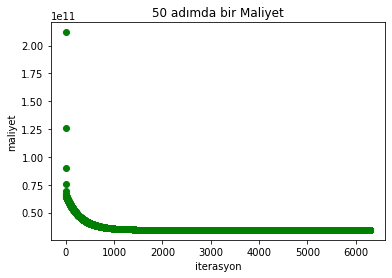

Maliyet[6350] =  34427073239.02676
Q :  [38577.444449855335, 3729312.8870868487, -238750.28431434833]


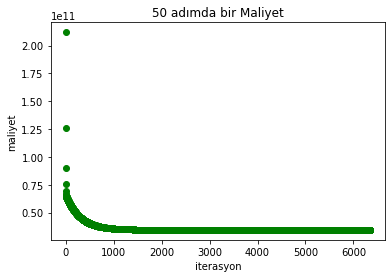

Maliyet[6400] =  34426634101.95658
Q :  [38575.3981571577, 3729446.3626817316, -240554.3076798726]


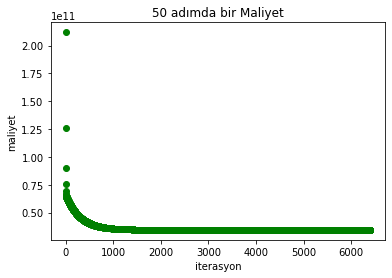

Maliyet[6450] =  34426201585.023575
Q :  [38573.437209448035, 3729577.9275810313, -242338.79488563645]


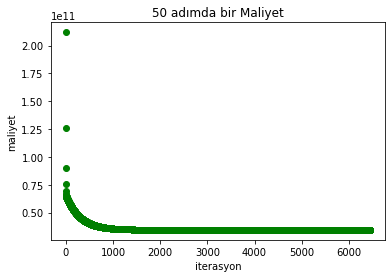

Maliyet[6500] =  34425775575.60185
Q :  [38571.555581112494, 3729707.6398902605, -244103.95521472843]


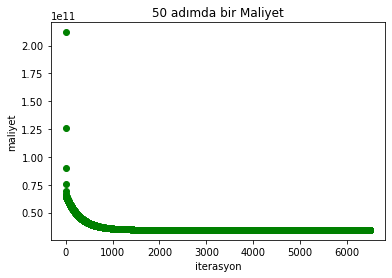

Maliyet[6550] =  34425355963.23068
Q :  [38569.7477237632, 3729835.5540658627, -245849.99589256608]


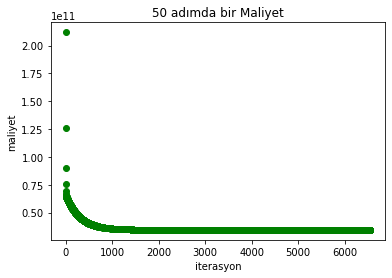

Maliyet[6600] =  34424942639.5654
Q :  [38568.008527798636, 3729961.721198594, -247577.12209205682]


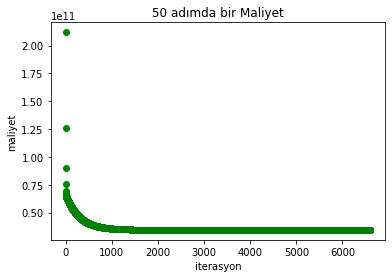

Maliyet[6650] =  34424535498.32989
Q :  [38566.33328706807, 3730086.189274143, -249285.53694008727]


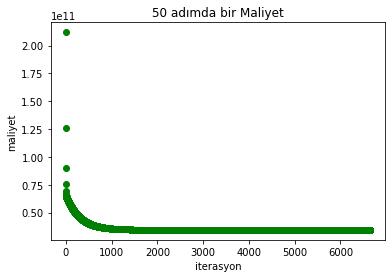

Maliyet[6700] =  34424134435.26959
Q :  [38564.71766638995, 3730209.0034128088, -250975.4415252171]


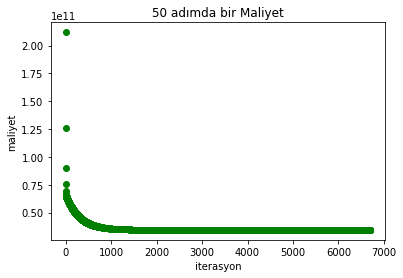

Maliyet[6750] =  34423739348.10836
Q :  [38563.15767168958, 3730330.206089968, -252647.0349064605]


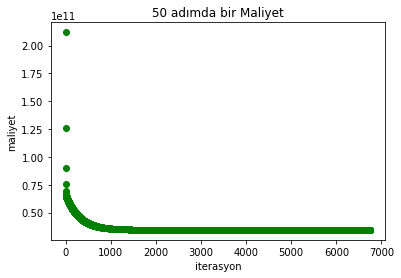

Maliyet[6800] =  34423350136.50244
Q :  [38561.64962255019, 3730449.8373388327, -254300.51412304808]


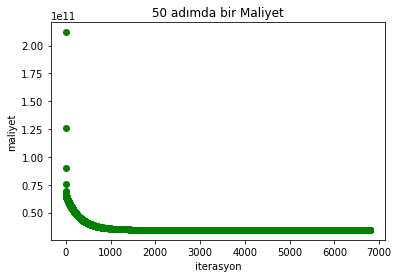

Maliyet[6850] =  34422966702.000565
Q :  [38560.19012697753, 3730567.934936968, -255936.07420507324]


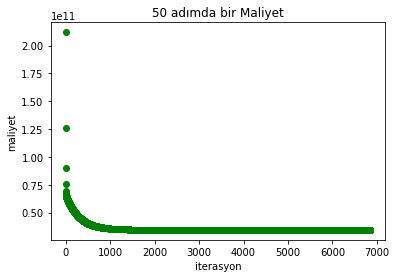

Maliyet[6900] =  34422588948.002106
Q :  [38558.77605820329, 3730684.53457785, -257553.90818493202]


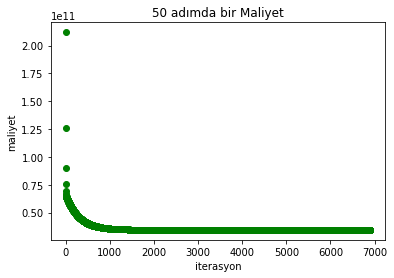

Maliyet[6950] =  34422216779.7173
Q :  [38557.404533359826, 3730799.670028689, -259154.2071094753]


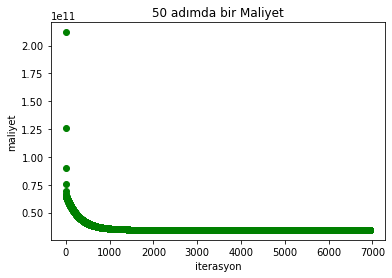

Maliyet[7000] =  34421850104.128426
Q :  [38556.07289387551, 3730913.373275627, -260737.16005279802]


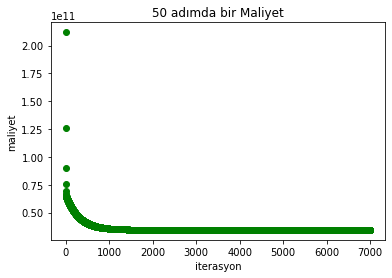

Maliyet[7050] =  34421488829.95244
Q :  [38554.778687453516, 3731025.6746573118, -262302.95412959595]


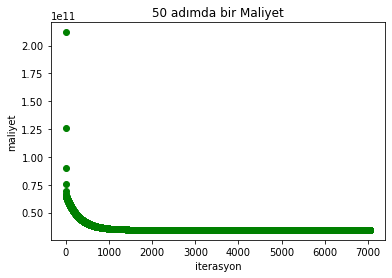

Maliyet[7100] =  34421132867.60444
Q :  [38553.51965150477, 3731136.602987798, -263851.7745090266]


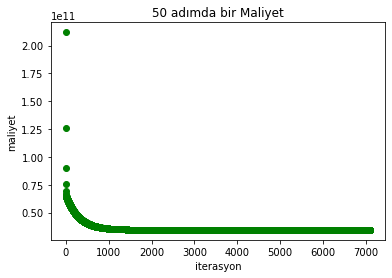

Maliyet[7150] =  34420782129.16158
Q :  [38552.293697917245, 3731246.185669634, -265383.8044290184]


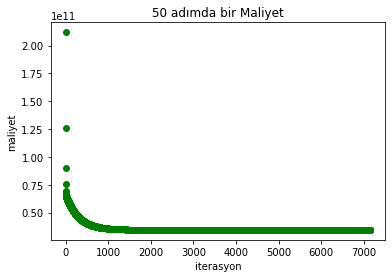

Maliyet[7200] =  34420436528.32909
Q :  [38551.09889905512, 3731354.448797923, -266899.2252109711]


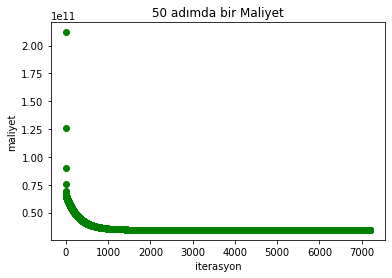

Maliyet[7250] =  34420095980.40525
Q :  [38549.93347488679, 3731461.4172560927, -268398.2162748036]


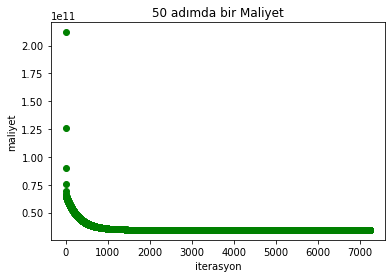

Maliyet[7300] =  34419760402.24957
Q :  [38548.795781152156, 3731567.1148040295, -269880.9551543005]


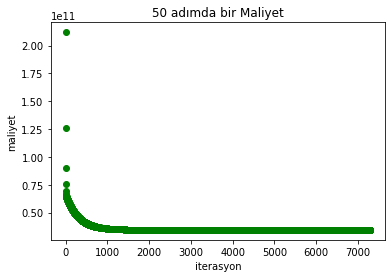

Maliyet[7350] =  34419429712.2501
Q :  [38547.684298483975, 3731671.564159209, -271347.6175127196]


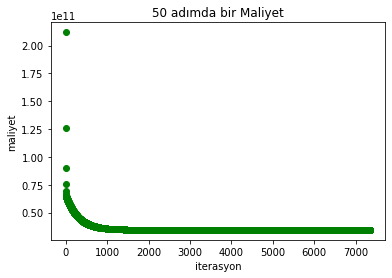

Maliyet[7400] =  34419103830.29207
Q :  [38546.59762240781, 3731774.787071368, -272798.37715862144]


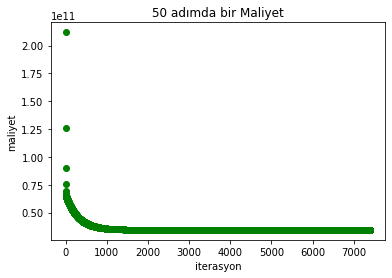

Maliyet[7450] =  34418782677.72724
Q :  [38545.53445414804, 3731876.8043912593, -274233.40606188716]


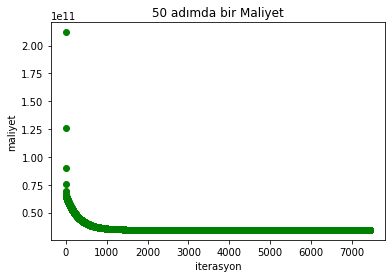

Maliyet[7500] =  34418466177.344765
Q :  [38544.49359217388, 3731977.636133956, -275652.874369895]


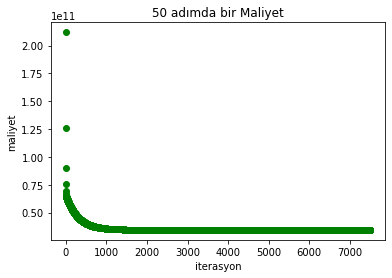

Maliyet[7550] =  34418154253.34055
Q :  [38543.473924431055, 3732077.3015371296, -277056.9504238237]


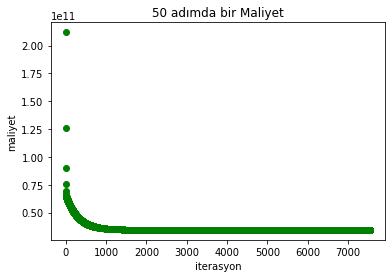

Maliyet[7600] =  34417846831.29003
Q :  [38542.47442119629, 3732175.8191147405, -278445.8007750611]


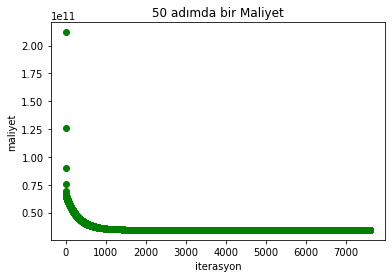

Maliyet[7650] =  34417543838.12068
Q :  [38541.49412850964, 3732273.206706479, -279819.59020168916]


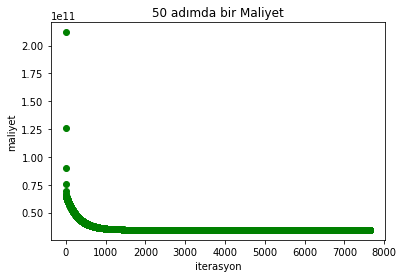

Maliyet[7700] =  34417245202.08282
Q :  [38540.53216213617, 3732369.4815233164, -281178.4817250302]


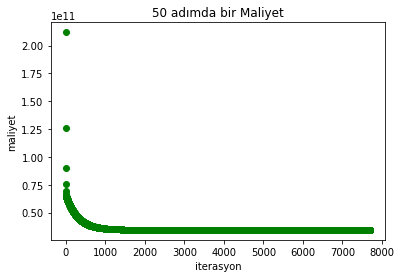

Maliyet[7750] =  34416950852.72559
Q :  [38539.587702014884, 3732464.660189466, -282522.636626228]


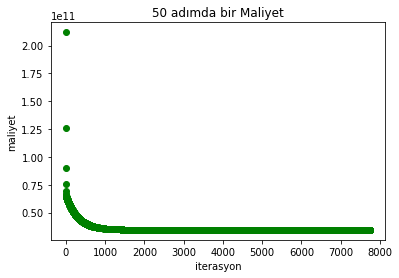

Maliyet[7800] =  34416660720.86957
Q :  [38538.659987153165, 3732558.758781068, -283852.21446284954]


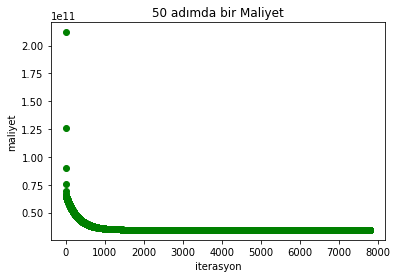

Maliyet[7850] =  34416374738.581535
Q :  [38537.74831093542, 3732651.792861825, -285167.3730854918]


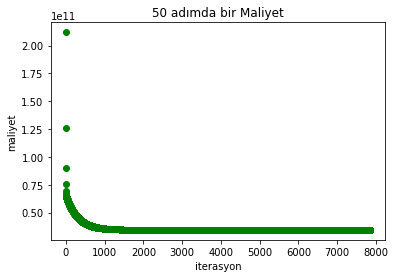

Maliyet[7900] =  34416092839.15055
Q :  [38536.852016807556, 3732743.7775158654, -286468.2686543751]


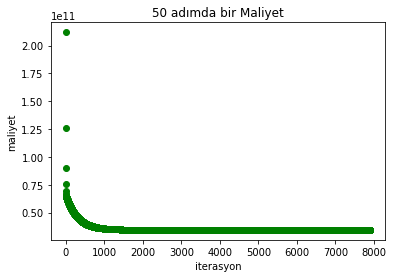

Maliyet[7950] =  34415814957.0626
Q :  [38535.97049431043, 3732834.7273780433, -287755.0556559131]


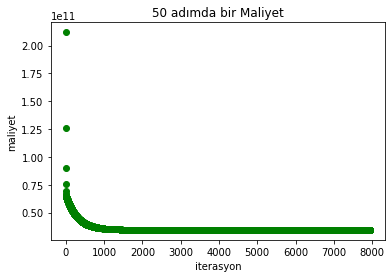

Maliyet[8000] =  34415541027.97772
Q :  [38535.103175432596, 3732924.6566618728, -289027.88691924524]


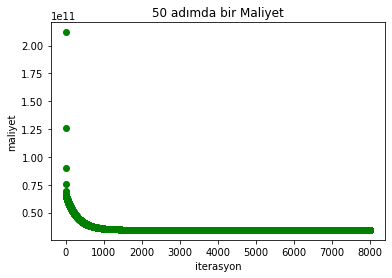

In [62]:
def GradientDescent(Q, X , Y , alfa=0.1, epoch=10000):
    # epoch sayısı kadar tablomuzu tekrar tekrar gezip, modelimizi eğiteceğiz.
    for i in range(epoch+1):
        # Her döngüde geçici olarak maliyeti hesaplayalım ve bu değeri cost listemize atalım
        tempCost = J(X=x_test, Y=y_test.values, Q0=Q[0], Q1=Q[1], Q2=Q[2])
        cost.append(tempCost) 

        # Paramtere hesaplama kısmı 
        q0 = Q[0] - alfa * J_derivate(X=X, Y=Y, Q0=Q[0], Q1=Q[1], Q2=Q[2], k=0)
        q1 = Q[1] - alfa * J_derivate(X=X, Y=Y, Q0=Q[0], Q1=Q[1], Q2=Q[2], k=1)
        q2 = Q[2] - alfa * J_derivate(X=X, Y=Y, Q0=Q[0], Q1=Q[1], Q2=Q[2], k=2)
        
        # Paramterlerin eşzamanlı güncellenmesi
        Q[0] = q0
        Q[1] = q1
        Q[2] = q2

        # her 50 adımda maliyetin yazılması ve tablo çizilmesi 
        if i % 50 == 0:
            print(f"Maliyet[{i}] = ",cost[i] )
            print(f"Q : ",Q)
            plt.scatter(x = range(len(cost)) ,y = cost, color="green")       
            # tanım
            plt.xlabel("iterasyon")
            plt.ylabel("maliyet")
            plt.title("50 adımda bir Maliyet")
            plt.show()    


GradientDescent(Q=Q, X=x_train , Y=y_train.values, alfa=0.35 , epoch=8000)

In [63]:
print(f"Q değerleri {Q}")

Q değerleri [38535.103175432596, 3732924.6566618728, -289027.88691924524]


### 3. Sonuçların Değerlendirilmesi 

Bu bölümde eğitirken gördüğümüz maliyet fonksiyon ve grafiği dışında elimizdeki Q değerleri ile her x'e karşılık gelen y değerleri tahmin edilecek ve gerçek y ile yüzde kaç saptığı değerlendirilecektir. En sonda ortalama yüzde kaçlık hata olduğu hesaplanacaktır.

In [64]:
hatalar = []
def degerlendirme():
    for i in range(len(x_test)):
        # print(f"Q[0]={Q[0]}  Q[1]={Q[1]}  Q[2]={Q[2]}")
        gercek = y_test.values[i]
        print(f"Gerçek {i}. veri = {gercek}")

        tahmin = Q[0] + Q[1] * float(x_test[i][0]) + Q[2] * float(x_test[i][1])
        
        # print("X verileri = ", x_test[i] ) 
        print(f"Tahmin {i}. veri = {tahmin}")

        aradaki_fark = (abs(gercek - tahmin) / gercek) * 100
        # print(f" %{aradaki_fark} hata")

        hatalar.append(aradaki_fark)
    print("Ortalama hatalar oranı %", (sum(hatalar)/len(hatalar)) )
degerlendirme()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Tahmin 3984. veri = 178238.88295775282
Gerçek 3985. veri = [484000.]
Tahmin 3985. veri = 413077.7728065116
Gerçek 3986. veri = [599000.]
Tahmin 3986. veri = 525537.8577200816
Gerçek 3987. veri = [481000.]
Tahmin 3987. veri = 320157.2419580594
Gerçek 3988. veri = [495000.]
Tahmin 3988. veri = 649129.3616635356
Gerçek 3989. veri = [790000.]
Tahmin 3989. veri = 319239.3007105377
Gerçek 3990. veri = [295000.]
Tahmin 3990. veri = 167434.16207165588
Gerçek 3991. veri = [221900.]
Tahmin 3991. veri = 288376.7907616758
Gerçek 3992. veri = [299900.]
Tahmin 3992. veri = 268140.42071999185
Gerçek 3993. veri = [350000.]
Tahmin 3993. veri = 445975.85490179464
Gerçek 3994. veri = [1385000.]
Tahmin 3994. veri = 1559284.7372059736
Gerçek 3995. veri = [454200.]
Tahmin 3995. veri = 696932.973288717
Gerçek 3996. veri = [327000.]
Tahmin 3996. veri = 474414.9918529555
Gerçek 3997. veri = [435000.]
Tahmin 3997. veri = 516070.842527493
Gerçek 3998. veri = [249950

-------------------------------------------------------------------------------

---

## Soru 2 

***b)*** Veri setindeki bütün öznitelikleri kullanarak çok değişkenli bir regresyon modeli ile evin fiyatını tahmin ediniz. 







Bu soru 3 aşamadan oluşmakta. 

1.   Verileri Hazırlama
2.   Gerekli Fonksiyonların Yazımı ve Eğitim
3.   Sonuçların değerlendirilmesi

### 1. Verileri Hazırlama 

Verilerimizden atmak istediğimiz sütunları drop ile atarak data frame'lerimizi hazırlıyoruz

In [90]:
X = data_frame.drop(['id', 'date', 'price', 'yr_renovated','zipcode','lat','long'], axis=1)
Y = data_frame[['price']]

x_train, x_test, y_train, y_test =  train_test_split(X,Y,train_size=0.7) # %70 ini test için ayır.
print(len(x_train.values))

print("Kolon sayısı :",len(X.columns))


# Q_all  = [-23000,46000,320000,380000,10000,180000,230000,370000,76000,600000,410000,270000,-260000,460000,6000]

x_train


15129
Kolon sayısı : 14


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
10221,4,1.75,1850,7730,1.0,0,0,5,7,1100,750,1956,2260,8581
19080,4,3.50,3530,7202,2.0,0,0,3,9,2660,870,2000,2810,8100
16284,2,1.75,2170,25732,1.0,0,2,4,8,2170,0,1952,3020,23135
21132,4,2.50,1983,6002,2.0,0,0,3,9,1983,0,2012,2502,4750
15942,4,2.00,1950,8040,1.0,0,0,3,7,1950,0,1961,1950,8092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516,7,4.00,3150,34830,1.0,0,0,3,9,3150,0,1957,2390,12054
9095,4,2.00,1670,9987,1.0,0,0,3,7,1670,0,1967,1640,7280
19529,4,4.00,4360,12081,2.0,0,0,3,10,4360,0,2007,2180,10800
9522,3,1.75,1630,28600,1.0,0,0,3,8,1630,0,1967,2260,26000


şimdi verilerimizi normalize edebiliriz.

In [91]:

scaler = MinMaxScaler()
scaler.fit(x_train) 
# x train scale edilecek. Bu yüzden uygun hale getirildi.
print(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test) 


print(type(y_train)) # pandas tipi
type(x_train)        # numpy tipi 
x_train

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
10221         4       1.75         1850      7730     1.0           0     0   
19080         4       3.50         3530      7202     2.0           0     0   
16284         2       1.75         2170     25732     1.0           0     2   
21132         4       2.50         1983      6002     2.0           0     0   
15942         4       2.00         1950      8040     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
8516          7       4.00         3150     34830     1.0           0     0   
9095          4       2.00         1670      9987     1.0           0     0   
19529         4       4.00         4360     12081     2.0           0     0   
9522          3       1.75         1630     28600     1.0           0     0   
327           4       2.00         2050      4400     1.5           0     0   

       condition  grade  sqft_above  sqft_basement 

array([[0.12121212, 0.21875   , 0.11237661, ..., 0.48695652, 0.31304348,
        0.01810519],
       [0.12121212, 0.4375    , 0.23993926, ..., 0.86956522, 0.40869565,
        0.0170059 ],
       [0.06060606, 0.21875   , 0.13667426, ..., 0.45217391, 0.44521739,
        0.05136737],
       ...,
       [0.12121212, 0.5       , 0.30296128, ..., 0.93043478, 0.29913043,
        0.02317657],
       [0.09090909, 0.21875   , 0.09567198, ..., 0.5826087 , 0.31304348,
        0.05791514],
       [0.12121212, 0.25      , 0.12756264, ..., 0.19130435, 0.32347826,
        0.01106378]])

### 2. Verileri Eğitmek için Fonksiyonlar


Burada hipotezi hesaplayacak olan işlemi ayrı bir fonksiyon yaparak okumayı kolaylaştıdık.

In [92]:
def Hq(X , Q_all:list):
    hq = 0 
    # Önce satırı al dizi olarak 
    # Satırı enumerate ile (indis,veri) olarak al
    # Q[indis] * veri
    for j, attr in enumerate(X, start=1): 
        hq = hq +  Q_all[j]*attr
    hq += Q_all[0]  
    return hq


Maliyet fonksiyonumuz 

In [93]:
def J_2(X, Y, Q_all:list ):
    """ VERİLEN Q DEĞERLERİ İÇİN TÜM TABLOYU DENER VE GERÇEK Y İLE FARKIN KARELERİNİ TOPLAR. BÖYLECE MALİYETİ ÖLÇER """

    # hx = Q0 + Q1*x1 + Q2x2  + . . .  
    
    total = 0
    satir_sayisi = len(X)
    kolon_sayisi = X.shape[1]
    result = 0 
    # hq = 0

    for i, satir in enumerate(X):
        # -------- bu kısım yukarıda Hq metoduna devredilmiştir -------------------
        # hq = 0
        # for j,attr in enumerate(satir , start=1):
        #     hq = hq +  Q[j]*attr
        # hq += Q[0] 
        # -------------------------------------------------------------------------
        # 
        # her satırı dizi olarak alıyorum ve Hq metoduna verip hipotezi uyguluyorum.
        
        total = total + ( Hq(X=satir,Q_all = Q_all) - Y[i][0])**2
         

    result = (1/2*satir_sayisi)*total
    return result

# J_2(X=x_train , Y=y_train.values , Q_all=Q_all)

Türevi alınmış maliyet fonksiyonu

In [95]:
def J_derivate_2(X, Y, Q_all:list , k:int ):
    """GRADİENT D. ALGORİTMASI İÇİN MALİYETİN, TÜREVİNİN ALINDIKTAN SONRA, HESAPLANDIĞI KISIM"""
     
    total = 0
    result = 0
    satir_sayisi = len(X)
    if(k==0):
        for i, satir in enumerate(X):
            total = total + ( Hq(X=satir,Q_all = Q_all) - Y[i][0] )
    else:
        for i, satir in enumerate(X): 
            total = total + ( Hq(X=satir,Q_all = Q_all) - Y[i][0] )*X[i][k-1]

    result = (1/satir_sayisi) * total 
    return result 


In [96]:
q_temp = []  # Q listesinin değişimini iterasyon sonuna kadar tutacağımız geçici liste
Q_all  = []
# başlangıç değeri için kolon sayısı + 1 adet 1 ekleyeceğim
for i in range(len(X.columns)+1):
    Q_all.append(1)
    q_temp.append(1)

print(Q_all)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Verilerin gradient descent ile eğitimi 

0. Maliyetim =  8.90591186952712e+18


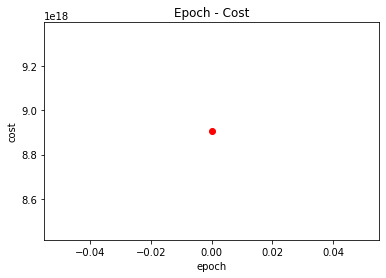

50. Maliyetim =  1.4614890519312207e+18


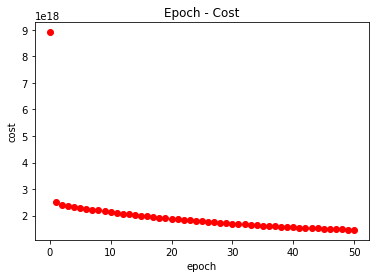

100. Maliyetim =  1.2156413929323917e+18


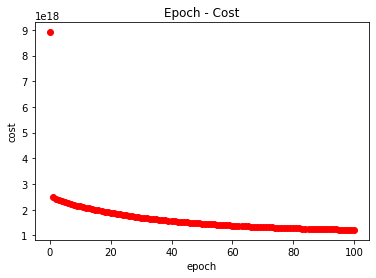

150. Maliyetim =  1.1340664149414401e+18


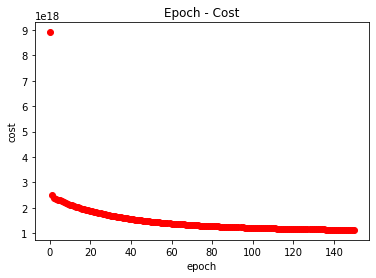

200. Maliyetim =  1.097951895585713e+18


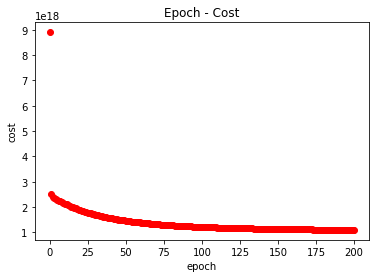

250. Maliyetim =  1.0781557391670075e+18


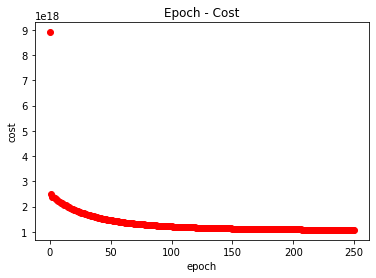

300. Maliyetim =  1.0654787214648632e+18


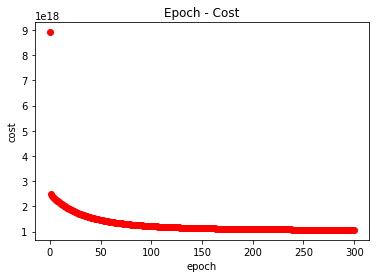

350. Maliyetim =  1.0563772256417974e+18


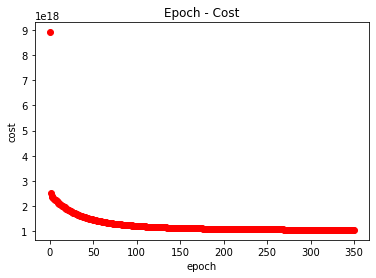

In [ ]:
import copy

cost_all = []

def Gd_with_all(X , Y , Q_all:list, alfa=0.1, epoch= 100 ):
    
    satir_sayisi = len(X)
    kolon_sayisi = X.shape[1]
    

    for i in range(epoch):

        temp_cost = J_2(X=x_test, Y=y_test.values, Q_all=Q_all)
        cost_all.append(temp_cost) 

        for j in range(kolon_sayisi+1):
            q_temp[j] = Q_all[j] - alfa * J_derivate_2(X=X, Y=Y, Q_all=Q_all, k=j)   
        

        Q_all = copy.deepcopy(q_temp)

        if i % 50 == 0:
            print(f"{i}. Maliyetim = ",temp_cost )
            plt.scatter(x = range(len(cost_all)) ,y = cost_all , color="red")       
            # tanım
            plt.xlabel("epoch")
            plt.ylabel("cost")
            plt.title("Epoch - Cost")
            plt.show()    
    

    print(Q_all)
    

Gd_with_all(X=x_train , Y=y_train.values, Q_all=Q_all, alfa=0.40 , epoch=500)

### 3. Sonuçların değerlendirilmesi 

Verilerin eğitimi sonucu modelimiz oluştu ve elimize Q[] değerleri geldi. Bu değerleri hipotez ile değerlendirip tahmini Y bulacağız.  Ardından gerçek Y değeri ile aralarındaki % farkına bakacağız. Bunu tüm x_test verileri için yapıp y_test verileri ile karşılaştıracağız. Her %'lik farkını daha sonrasında listemize ekleyip bu sayıların ortalamasını bularak tüm tahminlerin ortalamada  ne kadar saptığını görmüş olacağız.

In [89]:
hatalar = [] 
def percent_error():
    for i in range(len(x_test)):
        # print(f"Q[0]={Q[0]}  Q[1]={Q[1]}  Q[2]={Q[2]}")
        gercek = y_test.values[i]
        print(f"Gerçek {i}. veri = {gercek}")

        
        tahmin = Hq(X = x_test[i], Q_all = Q_all)
        
        # print("X verileri = ", x_test[i] ) 
        print(f"Tahmin {i}. veri = {tahmin}")

        aradaki_fark = (abs(gercek - tahmin) / gercek) * 100
        # print(f" %{aradaki_fark} hata")

        hatalar.append(aradaki_fark)
    print("Ortalama hatalar oranı %", (sum(hatalar)/len(hatalar)) )

percent_error()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Tahmin 3984. veri = 3.5020964612325103
Gerçek 3985. veri = [705380.]
Tahmin 3985. veri = 4.4986828946500275
Gerçek 3986. veri = [619850.]
Tahmin 3986. veri = 4.352515400599037
Gerçek 3987. veri = [530000.]
Tahmin 3987. veri = 4.197520214347295
Gerçek 3988. veri = [356000.]
Tahmin 3988. veri = 3.1638038530848798
Gerçek 3989. veri = [275000.]
Tahmin 3989. veri = 4.026774304597657
Gerçek 3990. veri = [270000.]
Tahmin 3990. veri = 3.4408320071515277
Gerçek 3991. veri = [485000.]
Tahmin 3991. veri = 4.86294245351351
Gerçek 3992. veri = [375000.]
Tahmin 3992. veri = 4.635795452906482
Gerçek 3993. veri = [755000.]
Tahmin 3993. veri = 4.917076934935244
Gerçek 3994. veri = [189950.]
Tahmin 3994. veri = 3.1992611893193854
Gerçek 3995. veri = [659000.]
Tahmin 3995. veri = 4.246787987984542
Gerçek 3996. veri = [524250.]
Tahmin 3996. veri = 4.2155140785122445
Gerçek 3997. veri = [1300000.]
Tahmin 3997. veri = 3.9647615991857044
Gerçek 3998. veri = [775